# Trade Wars Are Class Wars: Visualizing the Thesis

This notebook reproduces the key charts from Michael Pettis and Matthew Klein's book *Trade Wars Are Class Wars*.

It visualizes three core arguments:
1.  **The Surplus Genesis:** How China and Germany suppressed domestic consumption, forcing Savings > Investment.
2.  **The Deficit Mirror:** How the US absorbs excess capital, forcing Investment > Savings.
3.  **The "Class War":** The suppression of household consumption as a share of GDP in surplus nations compared to the US.

Data is fetched live from the World Bank API.

In [ ]:
# Install necessary libraries if not already installed
!pip install pandas pandas_datareader matplotlib seaborn requests

In [5]:
import pandas_datareader.wb as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure charts display inline and with high resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# --- CONFIGURATION ---
START_YEAR = 1995
END_YEAR = 2025
COUNTRIES = ['CHN', 'DEU', 'USA']
COUNTRY_NAMES = {'CHN': 'China', 'DEU': 'Germany', 'USA': 'United States'}

# World Bank Indicator Codes
INDICATORS = {
    'NY.GDS.TOTL.ZS': 'Gross Domestic Savings (% of GDP)',
    'NE.GDI.TOTL.ZS': 'Gross Capital Formation (% of GDP)', # Proxy for Investment
    'NE.CON.PRVT.ZS': 'Households Final Consumption Expenditure (% of GDP)',
    'BN.CAB.XOKA.GD.ZS': 'Current Account Balance (% of GDP)'
}

In [6]:
def fetch_data():
    """Fetches and cleans data from the World Bank API."""
    print("Fetching data from World Bank API... (This may take a moment)")
    try:
        # Fetch data for all countries and indicators at once
        df = wb.download(indicator=INDICATORS, country=COUNTRIES, start=START_YEAR, end=END_YEAR)
        
        # Reset index to make 'country' and 'year' columns
        df = df.reset_index()
        
        # Convert year to numeric
        df['year'] = pd.to_numeric(df['year'])
        
        # Rename columns for easier access
        df = df.rename(columns=INDICATORS)
        
        # Sort by country and year
        df = df.sort_values(by=['country', 'year'])
        return df
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

In [7]:
# Execute data fetch
df = fetch_data()

# Display the first few rows to verify structure
if df is not None:
    display(df.head())

Fetching data from World Bank API... (This may take a moment)


/var/folders/kl/l6gcmlzs2t7736h_y8m097_c0000gn/T/ipykernel_11465/3441511345.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=INDICATORS, country=COUNTRIES, start=START_YEAR, end=END_YEAR)


,country,year,Gross Domestic Savings (% of GDP),Gross Capital Formation (% of GDP),Households Final Consumption Expenditure (% of GDP),Current Account Balance (% of GDP)
0,China,1995,40.781743,39.092189,45.763625,0.219237
1,China,1996,39.768261,37.776864,46.886330,0.833944
2,China,1997,40.152446,35.741352,45.941415,3.819464
3,China,1998,39.368815,34.985949,45.534037,3.034516
4,China,1999,37.255865,34.233614,46.232008,1.912862


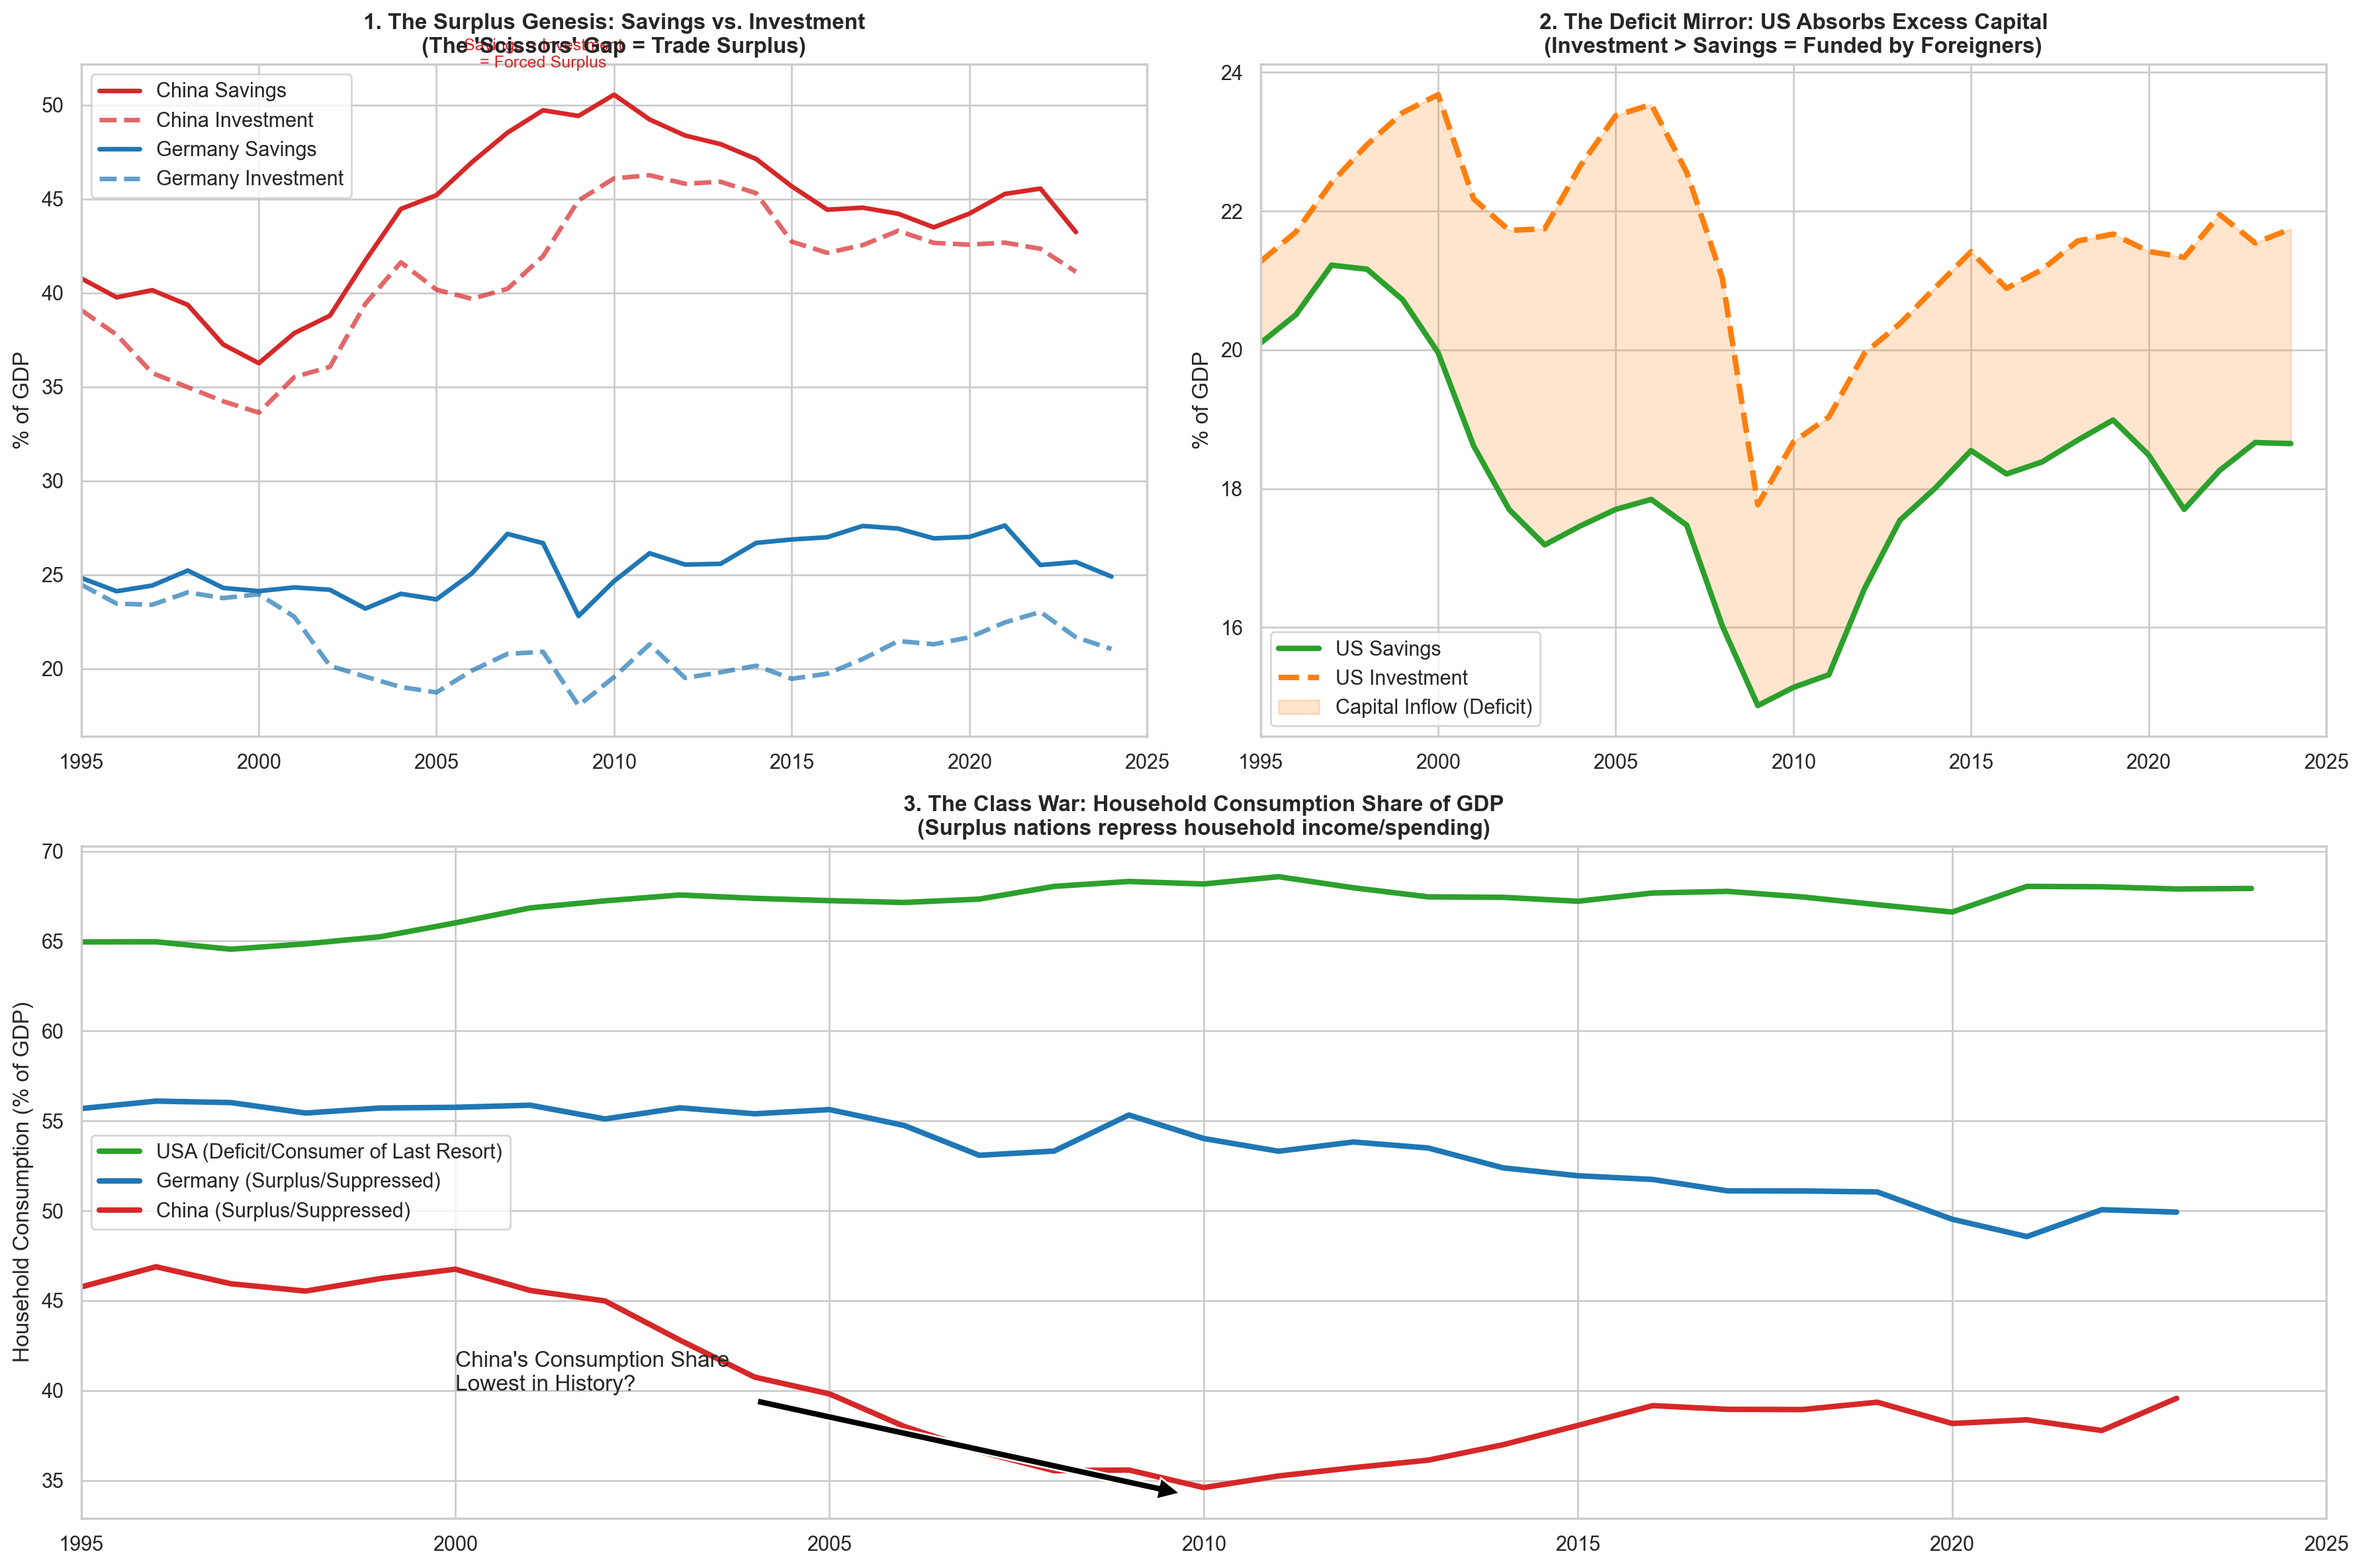

In [8]:
def plot_pettis_charts(df):
    # Set the visual style
    sns.set_theme(style="whitegrid")
    
    # Create a figure with 3 subplots (The 3 Key Arguments)
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(2, 2)
    
    # --- CHART 1: The "Scissors" (China & Germany) ---
    # Argument: Surplus countries suppress consumption, pushing Savings > Investment.
    # The gap between the lines IS the trade surplus.
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Plot China
    china_data = df[df['country'] == COUNTRY_NAMES['CHN']]
    ax1.plot(china_data['year'], china_data['Gross Domestic Savings (% of GDP)'], 
             label='China Savings', color='#d62728', linewidth=2.5)
    ax1.plot(china_data['year'], china_data['Gross Capital Formation (% of GDP)'], 
             label='China Investment', color='#d62728', linestyle='--', linewidth=2.5, alpha=0.7)
    
    # Plot Germany
    germany_data = df[df['country'] == COUNTRY_NAMES['DEU']]
    ax1.plot(germany_data['year'], germany_data['Gross Domestic Savings (% of GDP)'], 
             label='Germany Savings', color='#1f77b4', linewidth=2.5)
    ax1.plot(germany_data['year'], germany_data['Gross Capital Formation (% of GDP)'], 
             label='Germany Investment', color='#1f77b4', linestyle='--', linewidth=2.5, alpha=0.7)

    # Styling Chart 1
    ax1.set_title("1. The Surplus Genesis: Savings vs. Investment\n(The 'Scissors' Gap = Trade Surplus)", fontweight='bold')
    ax1.set_ylabel("% of GDP")
    ax1.legend()
    ax1.set_xlim(START_YEAR, END_YEAR)
    
    # Annotate the "Gap" concept
    ax1.text(2008, 52, "Savings > Investment\n= Forced Surplus", color='#d62728', fontsize=9, ha='center')

    # --- CHART 2: The "Sink" (United States) ---
    # Argument: The US absorbs the excess savings, forcing Investment > Savings.
    # The gap here is the Deficit.
    ax2 = fig.add_subplot(gs[0, 1])
    
    usa_data = df[df['country'] == COUNTRY_NAMES['USA']]
    
    ax2.plot(usa_data['year'], usa_data['Gross Domestic Savings (% of GDP)'], 
             label='US Savings', color='#2ca02c', linewidth=3)
    ax2.plot(usa_data['year'], usa_data['Gross Capital Formation (% of GDP)'], 
             label='US Investment', color='#ff7f0e', linestyle='--', linewidth=3)
    
    # Fill the deficit gap
    ax2.fill_between(usa_data['year'], 
                     usa_data['Gross Domestic Savings (% of GDP)'], 
                     usa_data['Gross Capital Formation (% of GDP)'], 
                     color='#ff7f0e', alpha=0.2, label='Capital Inflow (Deficit)')

    # Styling Chart 2
    ax2.set_title("2. The Deficit Mirror: US Absorbs Excess Capital\n(Investment > Savings = Funded by Foreigners)", fontweight='bold')
    ax2.set_ylabel("% of GDP")
    ax2.legend(loc='lower left')
    ax2.set_xlim(START_YEAR, END_YEAR)

    # --- CHART 3: The "Class War" (Household Consumption) ---
    # Argument: Surplus nations repress workers (low consumption share). 
    # Deficit nations (US) must consume more to balance global demand.
    ax3 = fig.add_subplot(gs[1, :]) # Spans bottom row
    
    ax3.plot(usa_data['year'], usa_data['Households Final Consumption Expenditure (% of GDP)'], 
             label='USA (Deficit/Consumer of Last Resort)', color='#2ca02c', linewidth=3)
    ax3.plot(germany_data['year'], germany_data['Households Final Consumption Expenditure (% of GDP)'], 
             label='Germany (Surplus/Suppressed)', color='#1f77b4', linewidth=3)
    ax3.plot(china_data['year'], china_data['Households Final Consumption Expenditure (% of GDP)'], 
             label='China (Surplus/Suppressed)', color='#d62728', linewidth=3)
    
    # Add annotation for Pettis's key point on China
    ax3.annotate('China\'s Consumption Share\nLowest in History?', 
                 xy=(2010, 34), xytext=(2000, 40),
                 arrowprops=dict(facecolor='black', shrink=0.05))

    # Styling Chart 3
    ax3.set_title("3. The Class War: Household Consumption Share of GDP\n(Surplus nations repress household income/spending)", fontweight='bold')
    ax3.set_ylabel("Household Consumption (% of GDP)")
    ax3.legend()
    ax3.set_xlim(START_YEAR, END_YEAR)

    plt.tight_layout()
    plt.show()

if df is not None:
    plot_pettis_charts(df)